For anmiation of GOL in python https://www.geeksforgeeks.org/conways-game-life-python-implementation/

# Implementing GOL

In [12]:
import argparse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# setting up the values for the grid
ON = 255
OFF = 0
vals = [ON, OFF]
 
def randomGrid(N):
 
    """returns a grid of NxN random values"""
    return np.random.choice(vals, N*N, p=[0.2, 0.8]).reshape(N, N)

def update(steps,grid, N):
 
    # copy grid since we require 8 neighbors
    # for calculation and we go line by line
  
    for s in range(steps):
        newGrid = grid.copy()
        for i in range(N):
            for j in range(N):

                # compute 8-neghbor sum
                # using toroidal boundary conditions - x and y wrap around
                # so that the simulaton takes place on a toroidal surface.
                total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
                             grid[(i-1)%N, j] + grid[(i+1)%N, j] +
                             grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                             grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255)

                # apply Conway's rules
                if grid[i, j]  == ON:
                    if (total < 2) or (total > 3):
                        newGrid[i, j] = OFF
                else:
                    if total == 3:
                        newGrid[i, j] = ON

        # update data
        grid[:] = newGrid[:]
    return(grid[:])

def timeseries(numofsteps,grid,N):
    series=[]
    series.append(grid.copy())
    for s in range(numofsteps):
        update(1,grid,N)
        series.append(grid.copy())
    return(series)

def genDataset(N,steps,):
    

In [11]:
N=3
steps=10
grid = randomGrid(N)
np.save("./timeseriesdata",timeseries(steps,grid,N))

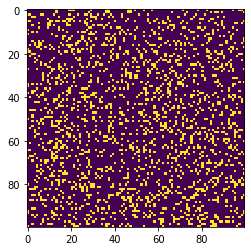

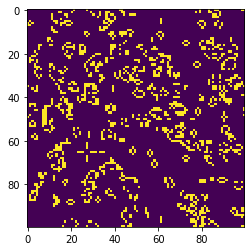

In [13]:
N=100
fig, ax = plt.subplots()
grid=randomGrid(N)
#grid=np.array([[255,0,0,0,0],[0,0,255,0,0],[0,255,0,0,0],[0,0,0,0,0],[0,0,0,0,0]])
img = ax.imshow(grid, interpolation='nearest')
for i in range(1):
    fig, ax = plt.subplots()
    update(10,grid,N)
    ax.imshow(grid, interpolation='nearest')

# Implementing some learning
See this for reference https://arxiv.org/pdf/1807.10300.pdf  
Tensorflow intro: https://www.tensorflow.org/tutorials/quickstart/beginner  
Loss functions: https://keras.io/api/losses/  
2D Convolutional layer: https://keras.io/api/layers/convolution_layers/convolution2d/  
for periodic padding see: https://stackoverflow.com/questions/39088489/tensorflow-periodic-padding  

Input: 3x3 layer  
Then either convolutional layers, or dense layers (or both).  
Output should by the probabilities of the central cell being ON or OFF  
i.e. last layer output of size 2 with 'softmax' activation  

In [ ]:
#generating a training and test dataset
import tensorflow as tf

#defining the learning model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding="valid",
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs)
  tf.keras.layers.Dense(2)
])
